Lecture: AI I - Basics 

Previous:
[**Chapter 4.1: Data Preparation with scikit-learn**](../04_ml/01_data_preparation.ipynb)

---

# Chapter 4.2: Machine Learning with scikit-learn

- [Decision Tree](#decision-tree)
- [Support Vector Machines](#support-vector-machines)
- [K-Means](#k-means)
- [Usage in Pipelines](#usage-in-pipelines)
- [Which Algorithm Should I Choose?](#which-algorithm-should-i-choose)

[Scikit-learn](https://scikit-learn.org/stable/index.html) offers a wide variety of machine learning algorithms. Since we do not have the time to look at all of them in detail, we will only examine a few algorithms from the areas of classification, regression, and clustering. For additional algorithms, we refer at this point to the [documentation](https://scikit-learn.org/stable/modules/classes.html), the [user guide](https://scikit-learn.org/stable/user_guide.html), and the [tutorials](https://scikit-learn.org/stable/tutorial/index.html). Furthermore, we also cannot go into the underlying mathematics.  


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

## Decision Tree
[Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree) are a supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules derived from the features.  

__Advantages:__  
- Easy to understand and interpret  
- Almost no data preprocessing required  

__Disadvantages:__  
- May not generalize well (overfitting)  
- Decision trees are often very unstable, as small changes in the data may result in a completely different tree  

### Classification with Decision Trees
The [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is capable of performing multi-class classification on a dataset. To do this, the `fit()` method only needs to be called on the object with the data and labels.  


In [2]:
from sklearn import tree
iris = datasets.load_iris()

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(iris.data, iris.target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Afterwards, it is possible to make predictions.  


In [3]:
dt_clf.predict([[5.1 , 3.4, 1.3, 0.3]])

array([0])

In [4]:
dt_clf.predict([[6.5, 3.2 , 5.2 , 1.7],])

array([1])

In [5]:
dt_clf.predict([[6.4, 2.7, 5.3, 2.4]])

array([2])

To visualize the decision tree, the function [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) can be used.  


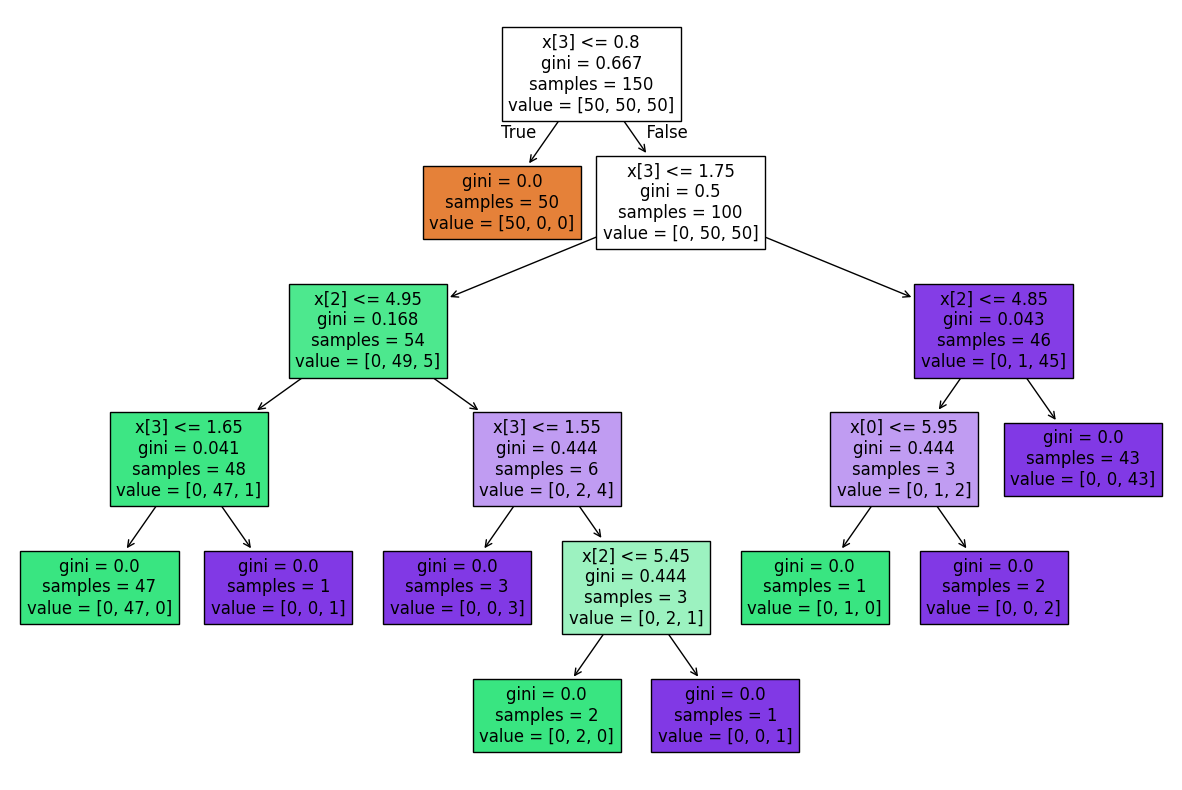

In [6]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dt_clf, filled=True)

Of course, the decision tree can also be parameterized. For example, the maximum depth of the tree can be specified with the parameter `max_depth`, and the function for measuring the quality of a split can be defined with the parameter `criterion`. Depending on the selected parameters, a different decision tree will be produced.  


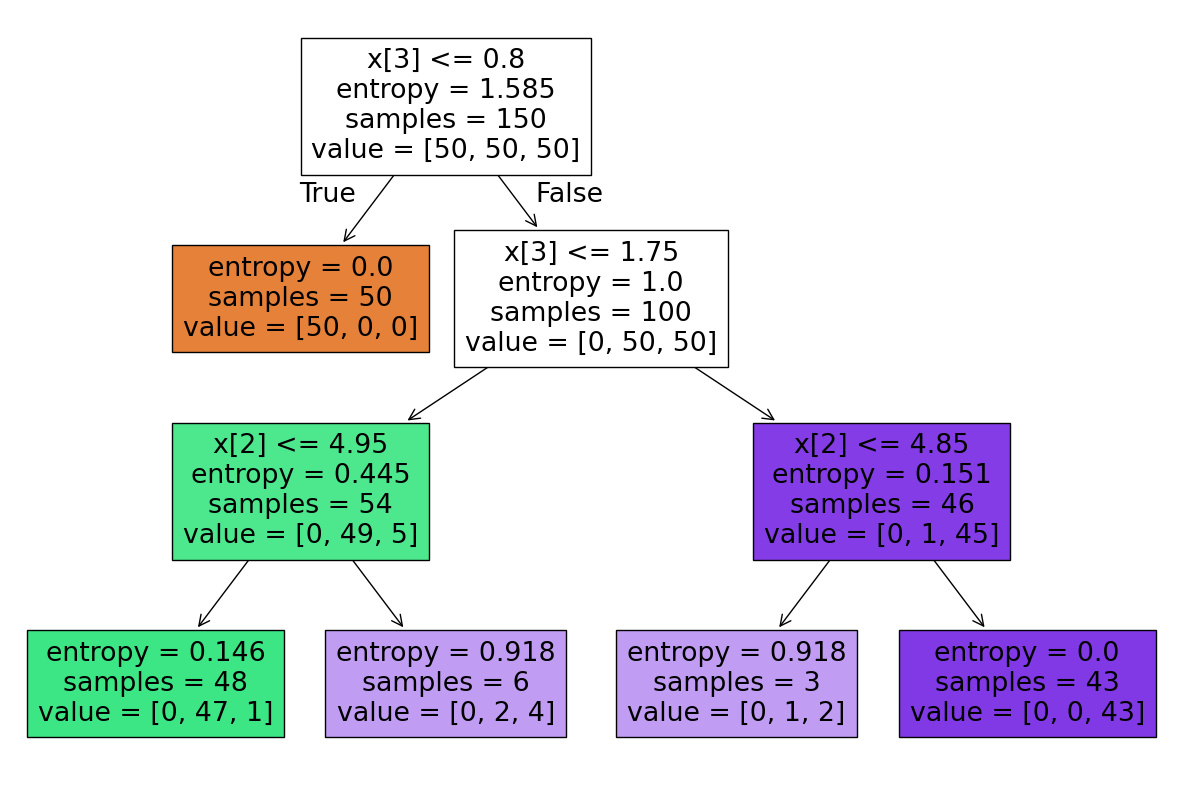

In [7]:
different_dt_clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
different_dt_clf.fit(iris.data, iris.target)

plt.figure(figsize=(15, 10))
_ = tree.plot_tree(different_dt_clf, filled=True)

### Regression with Decision Trees
Decision Trees can also be applied to regression problems. For this, sklearn provides the class [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).  


In [8]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [9]:
# Fit two regression models
regr_1 = tree.DecisionTreeRegressor(max_depth=2).fit(X, y)
regr_2 = tree.DecisionTreeRegressor(max_depth=5).fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

/tmp/ipykernel_9621/3012227454.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


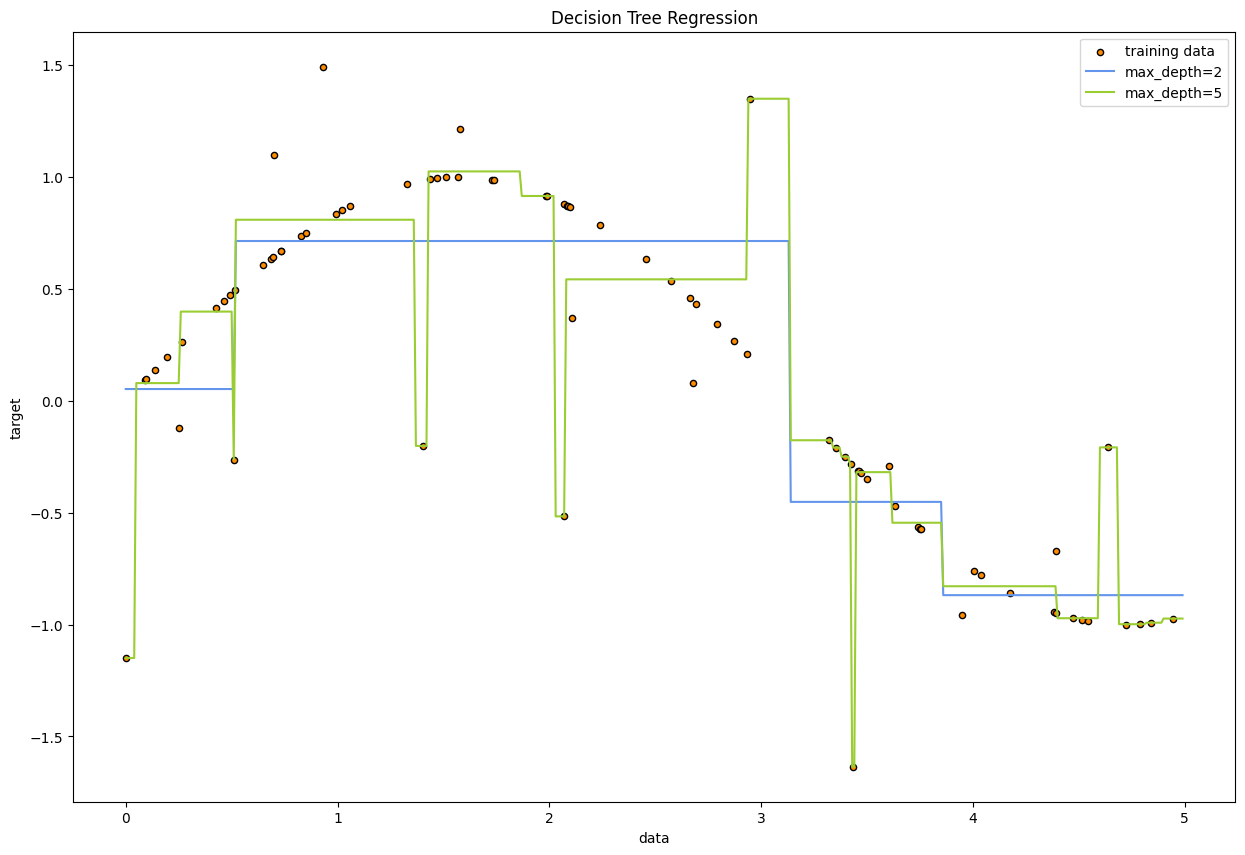

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="training data")
ax.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2")
ax.plot(X_test, y_2, color="yellowgreen", label="max_depth=5")

ax.set(
    title="Decision Tree Regression",
    xlabel="data",
    ylabel="target",
)
ax.legend()
fig.show()

__Exercises:__  
<details>
<summary>a) Which regressor models the data better and why?</summary>
The regressor with a maximum depth of 2 models the data better, because the deeper tree overfits.  
</details>

<details>
<summary>b) What could be a problem with the Decision Tree Regressor?</summary>
The Decision Tree Regressor does not represent a continuous space. Therefore, it may only be of limited use for many regression problems.  
</details>


The decision tree for regression problems can also be visualized using the `plot_tree` function.  


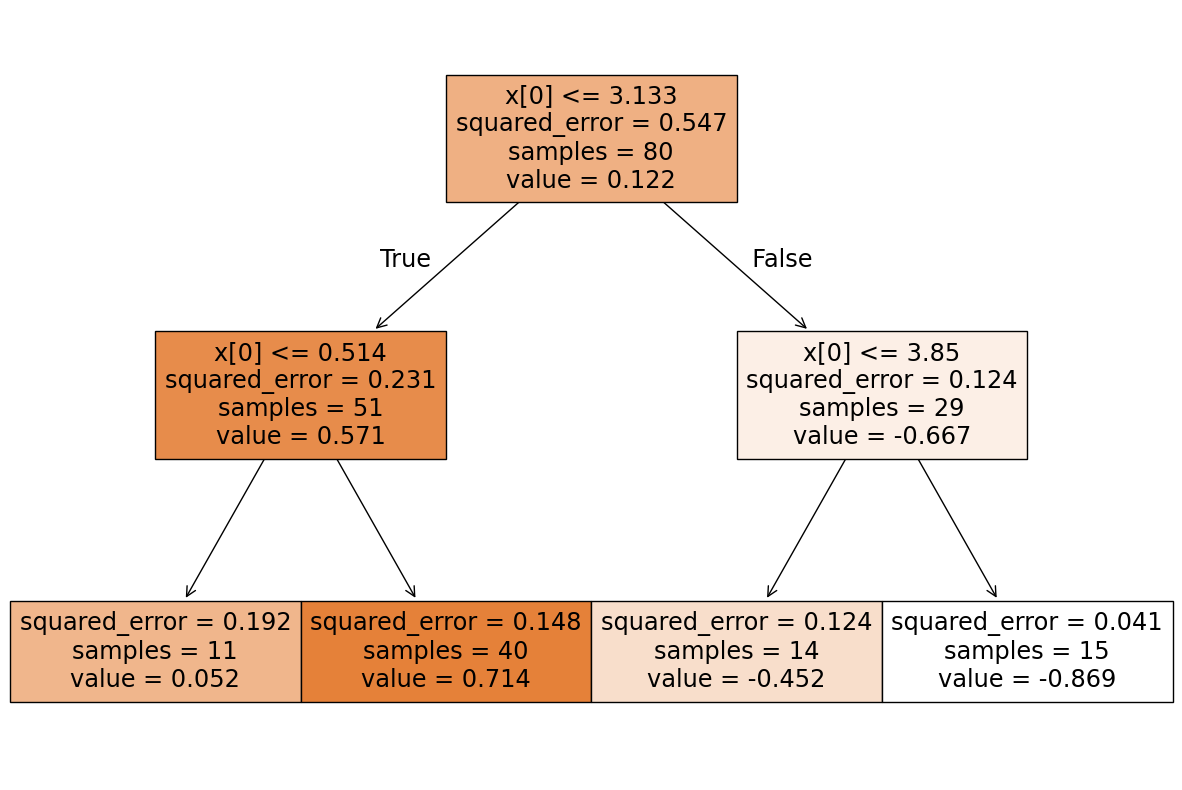

In [11]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(regr_1, filled=True)

The regressor can also be adjusted with various parameters. For example, with `min_samples_leaf` you can specify how many data points must be in a leaf of the tree at minimum.  


/tmp/ipykernel_9621/3614895325.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


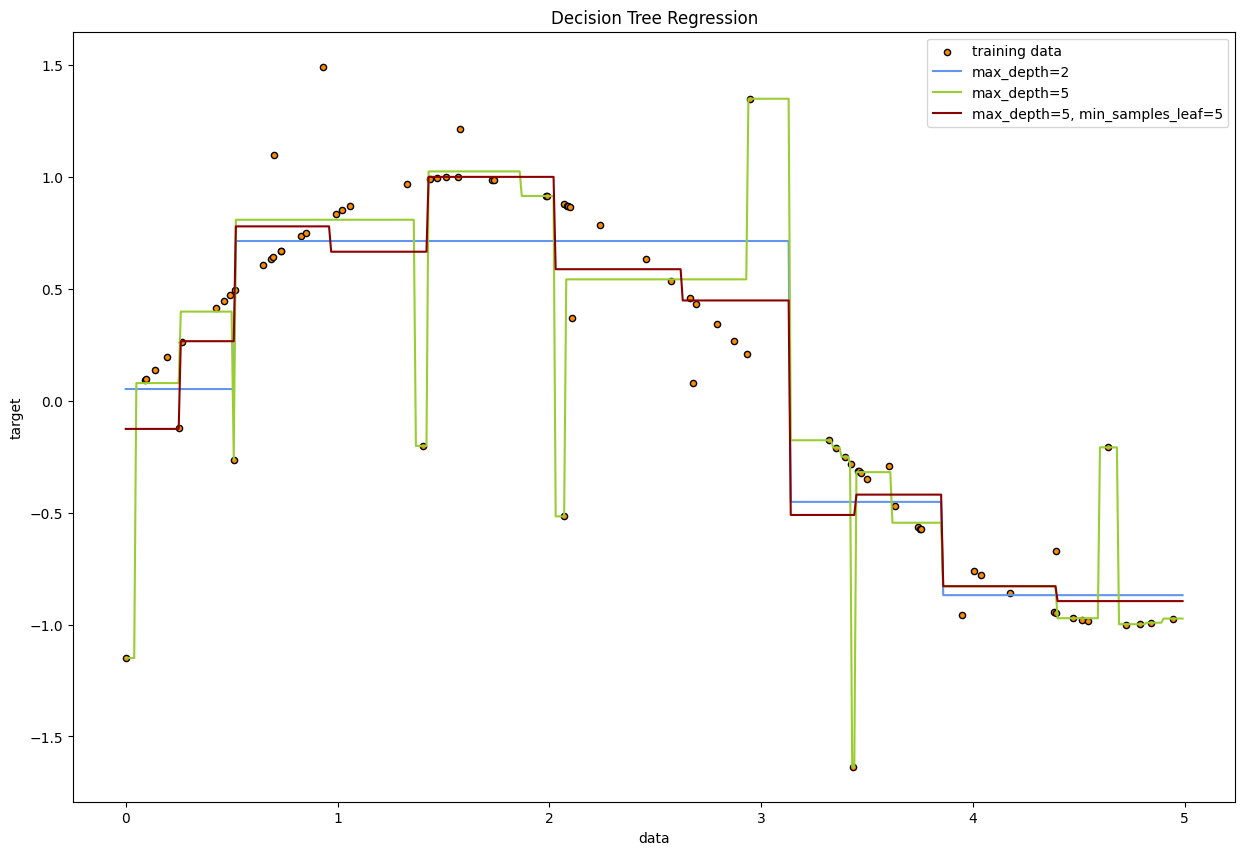

In [12]:
regr_3 = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=5).fit(X, y)
y_3 = regr_3.predict(X_test)

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="training data")
ax.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2")
ax.plot(X_test, y_2, color="yellowgreen", label="max_depth=5")
ax.plot(X_test, y_3, color="darkred", label="max_depth=5, min_samples_leaf=5")

ax.set(
    title="Decision Tree Regression",
    xlabel="data",
    ylabel="target",
)
ax.legend()
fig.show()

## Random Forest
The Random Forest is an algorithm that works according to the perturb-and-combine principle. This means that by introducing randomness into the construction of classifiers, a diverse set of classifiers is generated. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.  

In a Random Forest, many decision trees are collected, each of which predicts a value. Afterwards, all these predictions are combined to make a single prediction.  

For classification, the class [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) is used.  


In [13]:
from sklearn.ensemble import RandomForestClassifier

# construct a random forest with 3 trees and each tree is trained with maximal 80% of the data
random_forest = RandomForestClassifier(n_estimators=3, max_samples=0.8).fit(iris.data, iris.target)
random_forest

,n_estimators,3
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
random_forest.predict([[5.1 , 3.4, 1.3, 0.3]])

array([0])

Visualization of the different decision trees.  


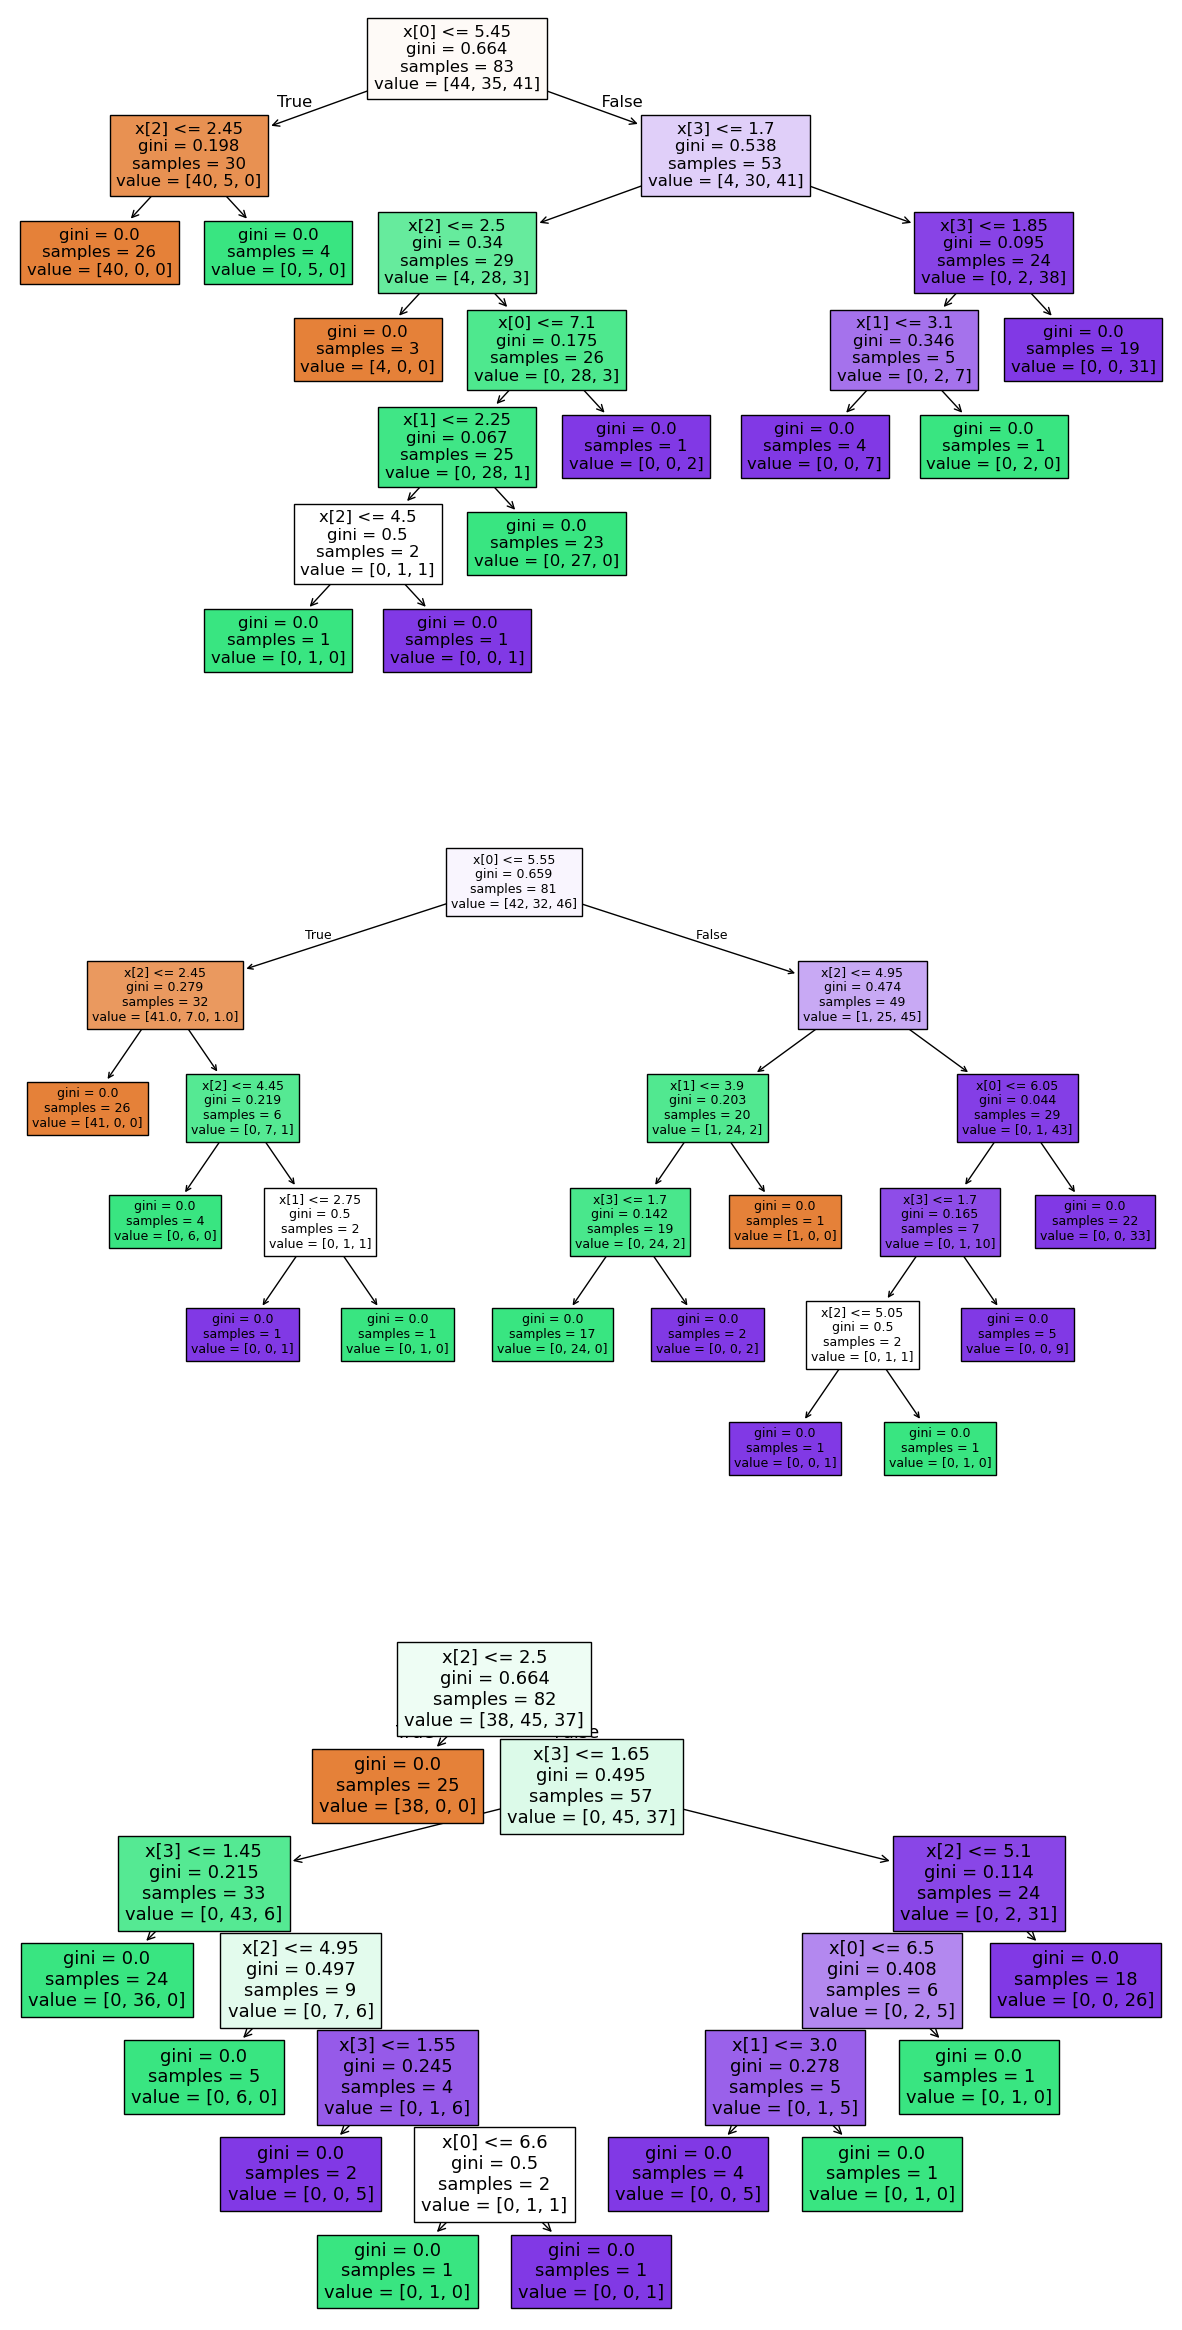

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 30))
for axis, dt in zip((ax1, ax2, ax3), random_forest.estimators_):
    _ = tree.plot_tree(dt, filled=True, ax=axis)

A Random Forest can also be used for regression problems. For this, the class [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is available.  


## Support Vector Machines
[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) (SVMs) are a set of supervised learning methods used for classification, regression, and outlier detection.  

__Advantages:__  
- Effective in high-dimensional spaces.  
- Still effective in cases where the number of dimensions is greater than the number of data points.  
- Very memory efficient, since only a fraction of the training data is stored (support vectors).  

__Disadvantages:__  
- SVMs do not directly output probabilities.  
- Risk of overfitting when the number of features is much larger than the number of data points.  

### Classification with Support Vector Machines
In the case of classification, the SVM tries to separate the data points into classes such that there is as wide a margin as possible free of objects around the class boundaries. In the figure below, both lines separate the classes, but line _A_ has a significantly larger margin.  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Svm_intro.svg">  

To separate the data, a different kernel is needed depending on the data. In the left part of the figure, the classes are linearly separable, while in the right part they are not. Therefore, it would make no sense to use a linear kernel there.  

<img src="https://upload.wikimedia.org/wikipedia/de/a/a0/Diskriminanzfunktion.png">  

In sklearn, the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class is available, which implements various kernels. A more detailed explanation of SVMs and the different parameters can be found [here](https://www.ancud.de/support-vector-machine-svn/).  


In [16]:
from sklearn import svm

# we just use 2 dimensions here because we want to visualize the result
X = iris.data[:, [2, 1]]
y = iris.target

models = (svm.SVC(kernel='linear', C=1), svm.SVC(kernel='rbf', C=1, gamma=.7))
models = (clf.fit(X, y) for clf in models)

In [17]:
# define helper functions
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), 
        np.arange(y_min, y_max, h),
    )
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

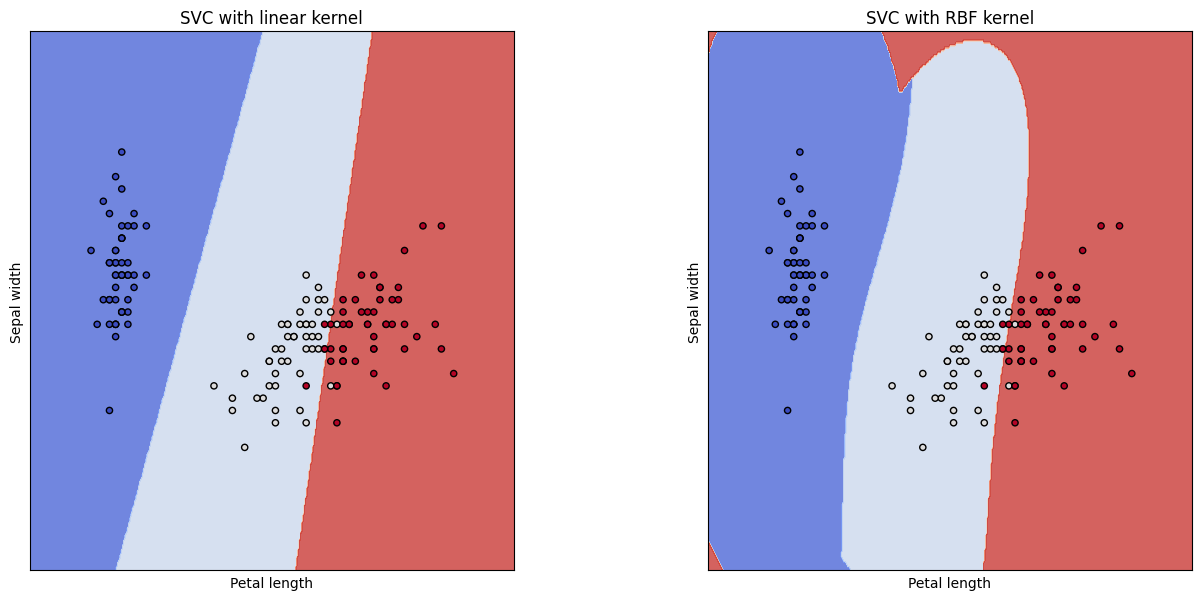

In [18]:
# title for the plots
titles = ('SVC with linear kernel', 'SVC with RBF kernel')

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


## k-means
The [KMeans]() algorithm clusters data by attempting to partition the data points into $n$ groups of equal variance while minimizing a criterion known as inertia or within-cluster sum-of-squares. It is an unsupervised learning method.  

$\sum_{i=0}^{n} \min_{\mu_j \in C} (\lVert x_i - \mu_j \rVert^{2})$

Roughly, the algorithm follows these steps:  
1. Select the $n$ initial centroids $C$. Often, these are simply random points from the training data.  
2. Assign the training data to the individual centroids based on the criterion above.  
3. Compute the new cluster centroids. These are obtained from the mean of all data points assigned to the cluster.  
4. If the change in the centroids is greater than a threshold, repeat step 2. If not, the cluster centroids have been found.  


### Creating dummy data  


In [19]:
# create 50 samples for each of the 3 centers
x, y = datasets.make_blobs(n_samples=1500, centers=3, random_state=42)

### Clustering with KMeans  


In [20]:
from sklearn.cluster import KMeans

# create a KMeans object that searches for 3 clusters 
km_clustering = KMeans(n_clusters=3, random_state=42)
km_clustering

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Text(0.5, 1.0, 'Vorhergesagte Cluster')

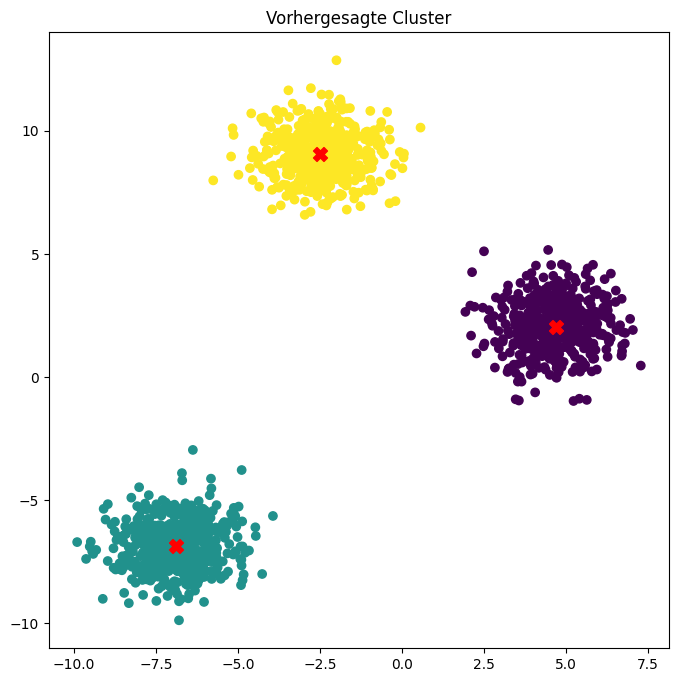

In [27]:
# Predict the clusters
y_pred = km_clustering.fit_predict(x)

# Visualize the result
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x[:, 0], x[:, 1], c=y_pred)
ax.scatter(
    km_clustering.cluster_centers_[:, 0], 
    km_clustering.cluster_centers_[:, 1], 
    marker='X', 
    c='red', 
    s=100,
)
ax.set_title("Vorhergesagte Cluster")

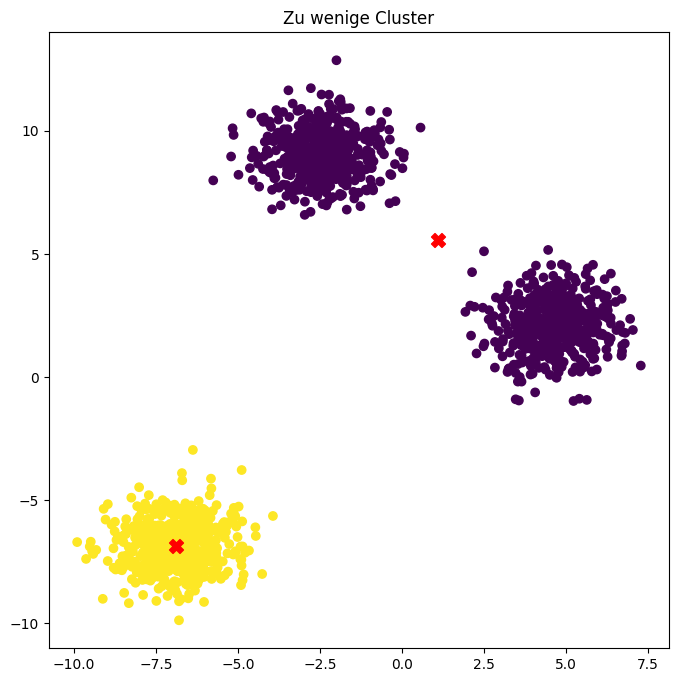

In [22]:
# let's check what happens if we take two instead of 3 clusters
km_clustering = KMeans(n_clusters=2, random_state=42)
y_pred = km_clustering.fit_predict(x)



# Visualize the result
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x[:, 0], x[:, 1], c=y_pred)
# plot centroids
ax.scatter(
    km_clustering.cluster_centers_[:, 0], 
    km_clustering.cluster_centers_[:, 1], 
    marker='X', 
    c='red', 
    s=100,
)
ax.set_title("Zu wenige Cluster")

Text(0.5, 1.0, 'Anisotropisch verteilte Cluster')

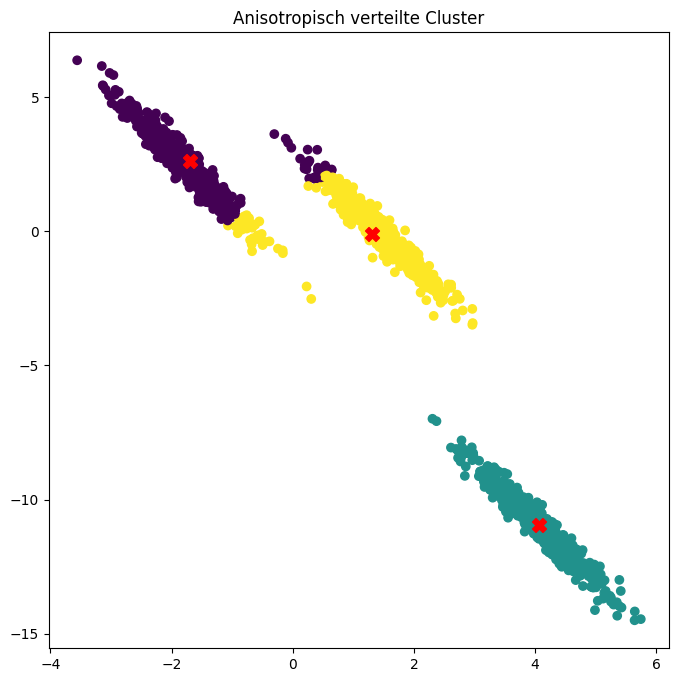

In [28]:
# transform the data
transformation = [[-0.50834549, 0.93667341], [0.30887718, -0.95253229]]
x_aniso = np.dot(x, transformation)

# let's fit our algorithm
km_clustering = KMeans(n_clusters=3, random_state=42)
y_pred = km_clustering.fit_predict(x_aniso)

# Visualize the result
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_aniso[:, 0], x_aniso[:, 1], c=y_pred)
# plot centroids
ax.scatter(
    km_clustering.cluster_centers_[:, 0], 
    km_clustering.cluster_centers_[:, 1], 
    marker='X', 
    c='red', 
    s=100,
)
ax.set_title("Anisotropisch verteilte Cluster")

Text(0.5, 1.0, 'Unterschiedliche Varianz')

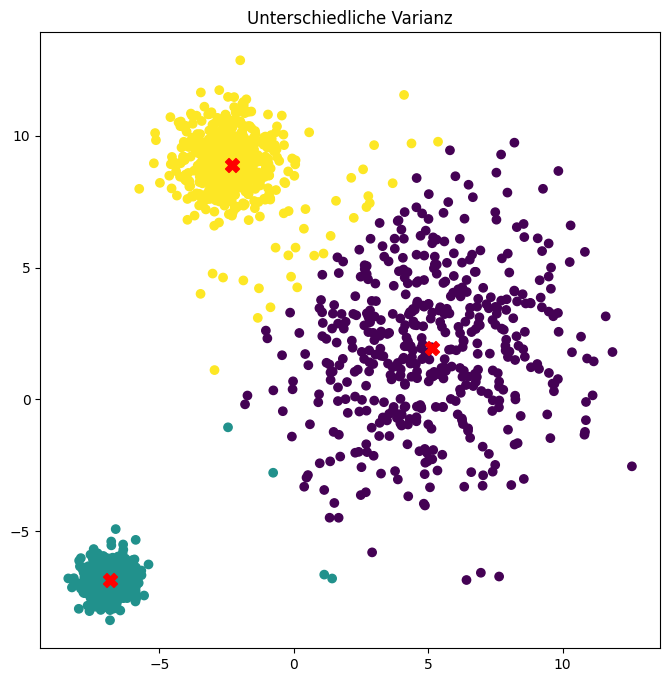

In [29]:
# Different variance
x_varied, y_varied = datasets.make_blobs(n_samples=1500, cluster_std=[1.0, 3., 0.5], random_state=42)

# let's fit our algorithm
km_clustering = KMeans(n_clusters=3, random_state=42)
y_pred = km_clustering.fit_predict(x_varied)

# Visualize the result
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_varied[:, 0], x_varied[:, 1], c=y_pred)
# plot centroids
ax.scatter(
    km_clustering.cluster_centers_[:, 0], 
    km_clustering.cluster_centers_[:, 1], 
    marker='X', 
    c='red', 
    s=100,
)
ax.set_title("Unterschiedliche Varianz")

## Usage in Pipelines
Of course, ML algorithms can also be added to a pipeline. However, this is only possible if the algorithm is added as the last step.  


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# create some dummy data
X, y = datasets.make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y)

# First, scale the input, then, classify it with a SVM
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.92

## General Functionality
As you have probably already noticed, the steps are always the same:  

1. __Constructor:__ Create the ML algorithm. Most algorithms can be parameterized in this step.  
2. __fit():__ Train the ML algorithm. If it is a supervised learning method, the target values (label or numerical value) are passed to the method along with the data. For an unsupervised learning method, only the data is passed.  
3. __predict():__ With the `predict()` method, the ML algorithm can then make predictions for the given values.  


---

Lecture: AI I - Basics 

Exercise: [**Exercise 4.2: Machine Learning with scikit-learn**](../04_ml/exercises/02_machine_learning.ipynb)

Next: [**Chapter 4.3: Evaluation with scikit-learn**](../04_ml/03_evaluation.ipynb)